Лабораторна робота №3
1. Бінарна класифікація на згенерованому наборі даних

In [143]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV


samples = 1000
random_state = 56


# * Генерація набору даних для бінарної класифікації
X, y = make_classification(
    n_samples=samples,
    random_state=random_state,
    n_informative=2,
    n_features=2,    
    n_clusters_per_class=2, 
    n_redundant=0
)

# * Об'єднання ознак та міток у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Target']) 
df.to_csv('data1.csv', index=False)
df

,Feature1,Feature2,Target
0,1.890497,-0.516969,1.0
1,-0.311476,-0.675809,0.0
2,-2.346685,1.472120,0.0
3,1.757155,-3.101016,0.0
4,1.803239,1.938098,1.0
...,...,...,...
995,-2.733852,-0.819498,0.0
996,-0.378322,0.671321,0.0
997,2.399617,-0.097265,1.0
998,-0.778922,-1.711344,1.0


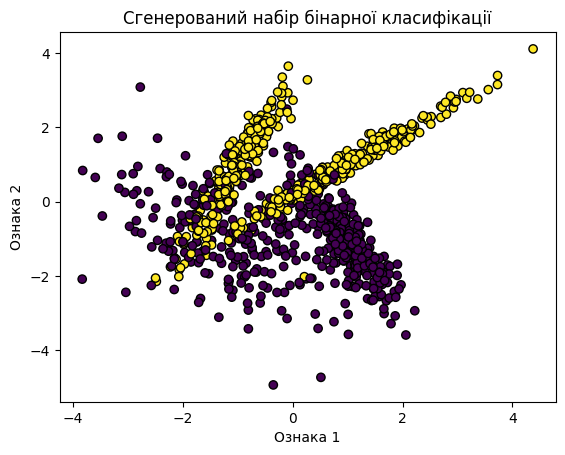

In [144]:
plt.scatter(X[:, 1], X[:, 0], c=y, cmap='viridis', marker='o', edgecolors='black')
plt.title('Сгенерований набір бінарної класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [145]:
data = pd.read_csv('data1.csv')

X = data.drop('Target', axis=1)
y = data['Target']
X_stud, X_test, y_stud, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

Точність: 81.0 %
Звіт про класифікацію:
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80        96
         1.0       0.81      0.83      0.82       104

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Оцінка AUC-ROC: 0.8682892628205128


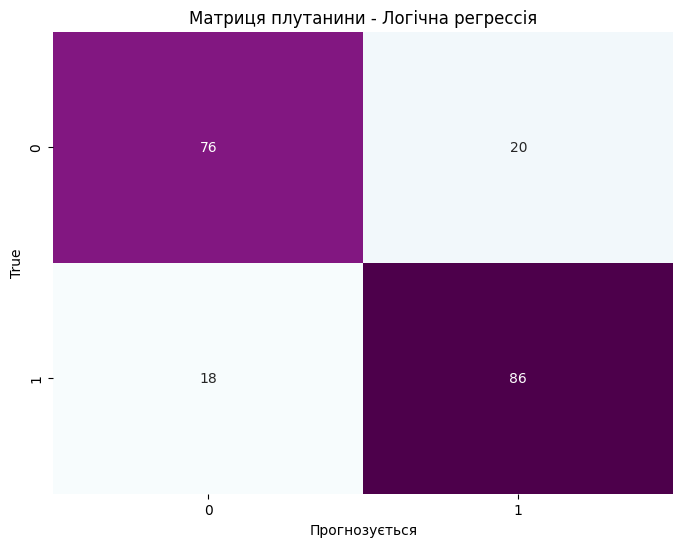

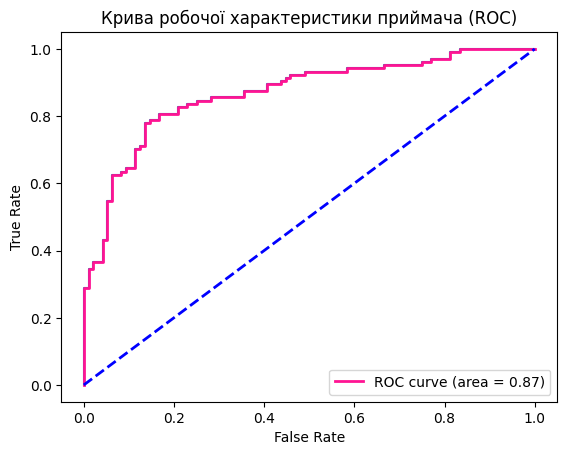

In [146]:

# * Навчання логістичної регресії
logistic_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
logistic_model.fit(X_stud, y_stud)

y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1] 

# * Оцінка ефективності логістичної регресії
print("Точність:", accuracy_score(y_test, y_pred_logistic)*100, '%')
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_logistic))
print("Оцінка AUC-ROC:", roc_auc_score(y_test, y_proba_logistic))

# * Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Прогнозується')
plt.ylabel('True')
plt.title('Матриця плутанини - Логічна регрессія')
plt.show()

# * Графік ROC-кривої
model = LogisticRegression()
model.fit(X_stud, y_stud)
y_pred = model.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr)

plt.title('Крива робочої характеристики приймача (ROC)')
plt.xlabel('False Rate')
plt.ylabel('True Rate')
plt.plot(fpr, tpr, c='deeppink', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='b', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.show()

2. Мультикласова класифікація на згенерованому наборі даних

In [154]:

# * Генерація набору даних для мультикласової класифікації
X, y = make_classification(
    n_samples=samples,
    n_features=4,
    n_informative=4,
    n_redundant=0,
    n_clusters_per_class=3,
    n_classes=4,
    random_state=random_state
)

# * Об'єднаємо ознаки та мітки у один DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2','Feature3', 'Feature4', 'Target'])
df.to_csv('data2.csv', index=False)
df

,Feature1,Feature2,Feature3,Feature4,Target
0,-1.220322,0.687696,0.913978,0.041757,0.0
1,2.453528,-0.153088,0.345109,0.391944,0.0
2,-0.551866,1.130734,1.667589,1.931500,3.0
3,1.613818,1.189635,-0.426250,-0.290822,0.0
4,1.114026,-3.487837,0.624111,-1.795456,2.0
...,...,...,...,...,...
995,-0.564713,1.261175,0.275315,0.790202,3.0
996,2.079674,-0.216767,4.463382,-2.405160,1.0
997,0.981349,-1.125039,1.647703,0.820808,2.0
998,-0.280264,1.249877,-1.685492,-3.343431,1.0


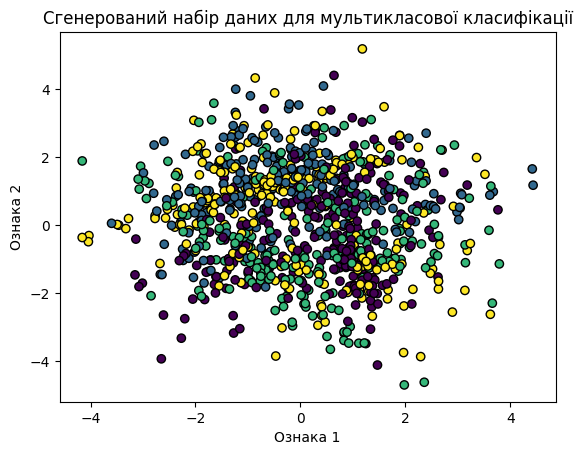

In [155]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolors='k')
plt.title('Сгенерований набір даних для мультикласової класифікації')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.show()

In [156]:
X_stud, X_test, y_stud, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# *  Завантаження даних
data = pd.read_csv('data2.csv')
data['Target'].value_counts()

Target
3.0    253
0.0    251
2.0    249
1.0    247
Name: count, dtype: int64

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# * Оцінка ефективності класифікатора
print("Точність:", accuracy_score(y_test, y_pred)*100, '%')
print("Відгук:", recall_score(y_test, y_pred, average='macro'))
print("F1-середнє:", f1_score(y_test, y_pred, average='macro'))

Точність: 23.5 %
Відгук: 0.23683673469387756
F1-середнє: 0.15588578088578087


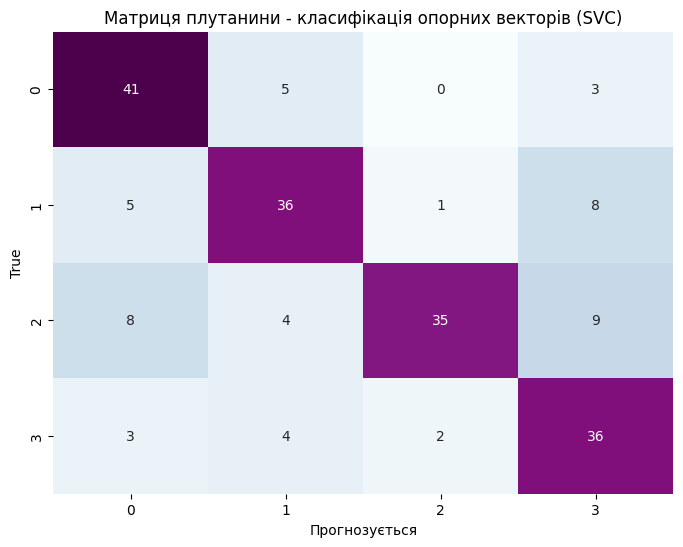

In [158]:

from sklearn.svm import SVC
svm_model = SVC(C=1, kernel='rbf', probability=True)
svm_model.fit(X_stud, y_stud)

y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Прогнозується')
plt.ylabel('True')
plt.title('Матриця плутанини - класифікація опорних векторів (SVC)')
plt.show()


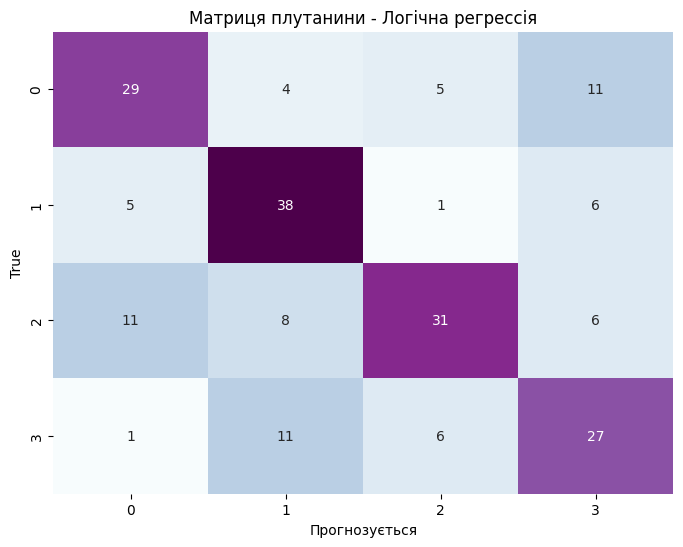

In [159]:

# * Навчання логістичної регресії
logistic_model = LogisticRegression(C=1, penalty='l2', solver='lbfgs')
logistic_model.fit(X_stud, y_stud)

y_pred_logistic = logistic_model.predict(X_test)
y_proba_logistic = logistic_model.predict_proba(X_test)[:, 1] 

# * Візуалізація матриці плутанини
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Прогнозується')
plt.ylabel('True')
plt.title('Матриця плутанини - Логічна регрессія')
plt.show()

3. Мультилейбл класифікація на реальному наборі даних з Інтернету

In [161]:
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('always')

data = pd.read_csv('albumlist.csv', encoding='cp1251')
data

,Number,Year,Album,Artist,Genre,Subgenre
0,1,1967,Sgt. Pepper's Lonely Hearts Club Band,The Beatles,Rock,"Rock & Roll, Psychedelic Rock"
1,2,1966,Pet Sounds,The Beach Boys,Rock,"Pop Rock, Psychedelic Rock"
2,3,1966,Revolver,The Beatles,Rock,"Psychedelic Rock, Pop Rock"
3,4,1965,Highway 61 Revisited,Bob Dylan,Rock,"Folk Rock, Blues Rock"
4,5,1965,Rubber Soul,The Beatles,"Rock, Pop",Pop Rock
...,...,...,...,...,...,...
495,496,1969,Boz Scaggs,Boz Scaggs,Rock,Pop Rock
496,497,2001,White Blood Cells,The White Stripes,Rock,"Indie Rock, Alternative Rock, Blues Rock, Gara..."
497,498,1989,The Stone Roses,The Stone Roses,Rock,Indie Rock
498,499,1971,Live in Cook County Jail,B.B. King,Blues,Electric Blues


In [163]:

label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])

data.fillna(data.mean(), inplace=True)

X = data[['Year', 'Album', 'Artist']]
y = data[['Genre', 'Subgenre']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model = MultiOutputClassifier(RandomForestClassifier(random_state=random_state))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# * Ітерація кожної мітки окремо
for i in range(y_test.shape[1]):
    label = y_test.columns[i]
    accuracy = accuracy_score(y_test[label], y_pred[:, i])
    precision = precision_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    recall = recall_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)
    f1 = f1_score(y_test[label], y_pred[:, i], average='weighted', zero_division=0.0)

    print("\n Оцінка ефективності  '{}':".format(label))
    print("* Точність: {:.2f}".format(accuracy))
    print("* Precision: {:.2f}".format(precision))
    print("* Відгук: {:.2f}".format(recall))
    print("* F1-середнє: {:.2f}".format(f1))



 Оцінка ефективності  'Genre':
* Точність: 0.54
* Precision: 0.42
* Відгук: 0.54
* F1-середнє: 0.45

 Оцінка ефективності  'Subgenre':
* Точність: 0.05
* Precision: 0.05
* Відгук: 0.05
* F1-середнє: 0.05
